In [74]:
# FOR TESTED FILE

In [75]:
import pandas as pd

In [76]:
from xgboost import XGBClassifier

In [77]:
db=pd.read_csv("C:\\Users\\Mir Niyaz\\Documents\\tested.csv")

In [78]:
db

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [79]:
db.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [80]:
db.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [81]:
db.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [82]:
db.Age=db.Age.fillna(db.Age.mean())

In [83]:
db.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [84]:
from sklearn.impute import SimpleImputer
import numpy as np

In [85]:
c=['Cabin']
imputer=SimpleImputer(missing_values=np.NAN,strategy='most_frequent')
db[c]=imputer.fit_transform(db[c])

In [86]:
db.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [87]:
db['Fare']=db.Fare.ffill()

In [88]:
db

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,B57 B59 B63 B66,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,B57 B59 B63 B66,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,B57 B59 B63 B66,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,B57 B59 B63 B66,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,B57 B59 B63 B66,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,B57 B59 B63 B66,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,B57 B59 B63 B66,S
416,1308,0,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,B57 B59 B63 B66,S


In [89]:
db.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [90]:
db.drop(['PassengerId','Name','SibSp','Parch','Ticket','Fare'],inplace=True,axis=1)     #We can drop them as we dont need them.

In [91]:
db

,Survived,Pclass,Sex,Age,Cabin,Embarked
0,0,3,male,34.50000,B57 B59 B63 B66,Q
1,1,3,female,47.00000,B57 B59 B63 B66,S
2,0,2,male,62.00000,B57 B59 B63 B66,Q
3,0,3,male,27.00000,B57 B59 B63 B66,S
4,1,3,female,22.00000,B57 B59 B63 B66,S
...,...,...,...,...,...,...
413,0,3,male,30.27259,B57 B59 B63 B66,S
414,1,1,female,39.00000,C105,C
415,0,3,male,38.50000,B57 B59 B63 B66,S
416,0,3,male,30.27259,B57 B59 B63 B66,S


In [92]:
db.Cabin.value_counts()

B57 B59 B63 B66    330
C89                  2
C116                 2
C80                  2
C55 C57              2
                  ... 
E45                  1
E52                  1
D30                  1
C62 C64              1
C105                 1
Name: Cabin, Length: 76, dtype: int64

In [93]:
db.drop(['Cabin'],inplace=True,axis=1)

In [94]:
db.Sex=db.Sex.map({'male':0,'female':1})         #To change from string to integer

In [95]:
db

,Survived,Pclass,Sex,Age,Embarked
0,0,3,0,34.50000,Q
1,1,3,1,47.00000,S
2,0,2,0,62.00000,Q
3,0,3,0,27.00000,S
4,1,3,1,22.00000,S
...,...,...,...,...,...
413,0,3,0,30.27259,S
414,1,1,1,39.00000,C
415,0,3,0,38.50000,S
416,0,3,0,30.27259,S


In [96]:
x=db[['Pclass','Sex','Age']]                   #For Taking them in x Axis

In [97]:
x

,Pclass,Sex,Age
0,3,0,34.50000
1,3,1,47.00000
2,2,0,62.00000
3,3,0,27.00000
4,3,1,22.00000
...,...,...,...
413,3,0,30.27259
414,1,1,39.00000
415,3,0,38.50000
416,3,0,30.27259


In [98]:
y=db.iloc[:,0]
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [99]:
db

,Survived,Pclass,Sex,Age,Embarked
0,0,3,0,34.50000,Q
1,1,3,1,47.00000,S
2,0,2,0,62.00000,Q
3,0,3,0,27.00000,S
4,1,3,1,22.00000,S
...,...,...,...,...,...
413,0,3,0,30.27259,S
414,1,1,1,39.00000,C
415,0,3,0,38.50000,S
416,0,3,0,30.27259,S


In [100]:
#IMPORTING TRAIN TEST SPLIT

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [103]:
x_train

,Pclass,Sex,Age
172,3,0,23.0
167,3,0,18.0
14,1,1,47.0
401,2,0,38.0
235,3,0,20.0
...,...,...,...
17,3,0,21.0
333,3,1,19.0
64,1,0,13.0
311,3,0,22.0


In [104]:
y_train

172    0
167    0
14     1
401    0
235    0
      ..
17     0
333    1
64     0
311    0
141    1
Name: Survived, Length: 334, dtype: int64

In [105]:
x_test

,Pclass,Sex,Age
188,3,1,30.27259
336,2,0,32.00000
275,2,1,20.00000
29,3,0,30.27259
305,1,1,64.00000
...,...,...,...
24,1,1,48.00000
173,3,0,30.27259
386,3,0,24.00000
92,1,1,27.00000


In [106]:
y_test

188    1
336    0
275    1
29     0
305    1
      ..
24     1
173    0
386    0
92     1
319    0
Name: Survived, Length: 84, dtype: int64

In [107]:
len(x_train)

334

In [108]:
len(y_train)

334

In [109]:
len(x_test)

84

In [110]:
len(y_test)

84

In [111]:
# #IMPORT SEABORN

In [112]:
import seaborn as sns

<AxesSubplot:xlabel='Survived', ylabel='count'>

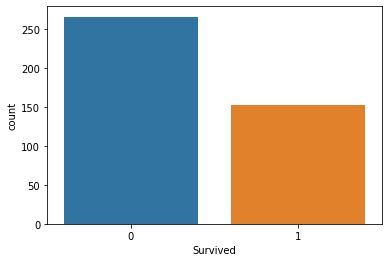

In [113]:
sns.countplot(x='Survived',data=db)

<AxesSubplot:xlabel='Survived', ylabel='count'>

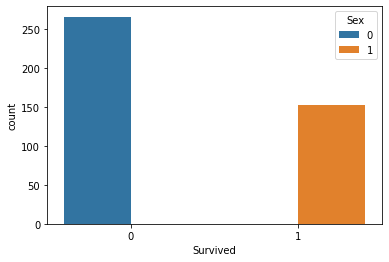

In [701]:
sns.countplot(x='Survived',hue='Sex',data=db)

<AxesSubplot:xlabel='Survived', ylabel='count'>

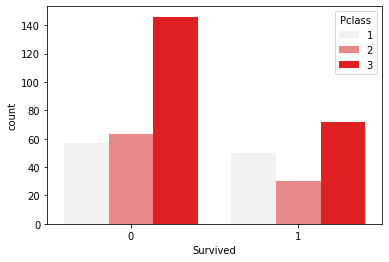

In [702]:
sns.countplot(x='Survived',hue='Pclass',data=db,color='red')

<AxesSubplot:xlabel='Survived', ylabel='count'>

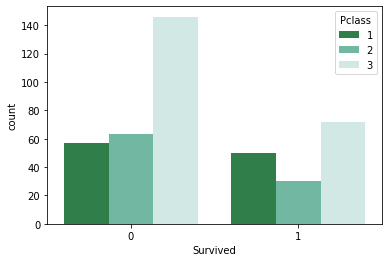

In [703]:
sns.countplot(x='Survived',hue='Pclass',data=db,palette='BuGn_r')

c:\python 3.8\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

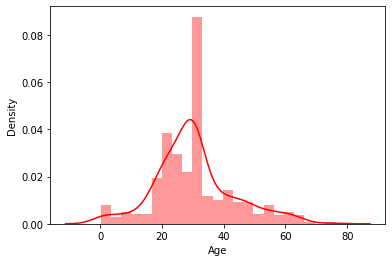

In [704]:
sns.distplot(db['Age'].dropna(),color="red")

c:\python 3.8\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

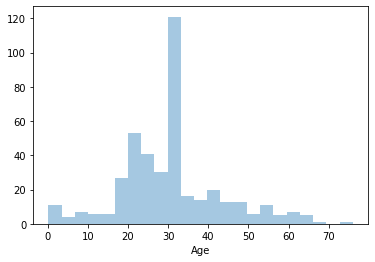

In [705]:
sns.distplot(db['Age'].dropna(),kde=False)

<AxesSubplot:>

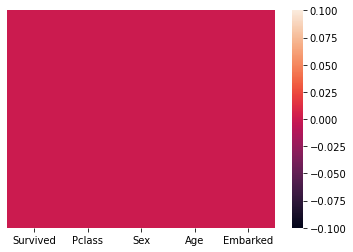

In [706]:
sns.heatmap(db.isnull(),yticklabels=False)

<AxesSubplot:>

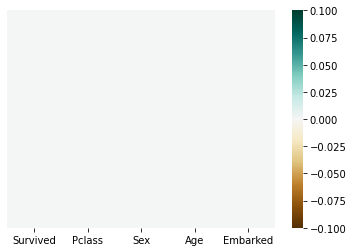

In [707]:
sns.heatmap(db.isnull(),yticklabels=False,cmap='BrBG')

<AxesSubplot:>

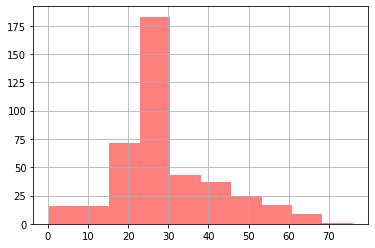

In [708]:
db['Age'].hist(color="red",alpha=0.5)

<AxesSubplot:>

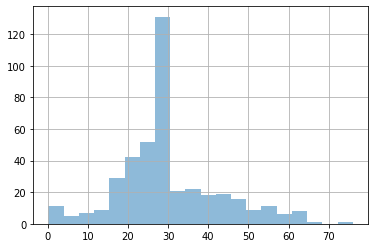

In [709]:
db['Age'].hist(alpha=0.5,bins=20)

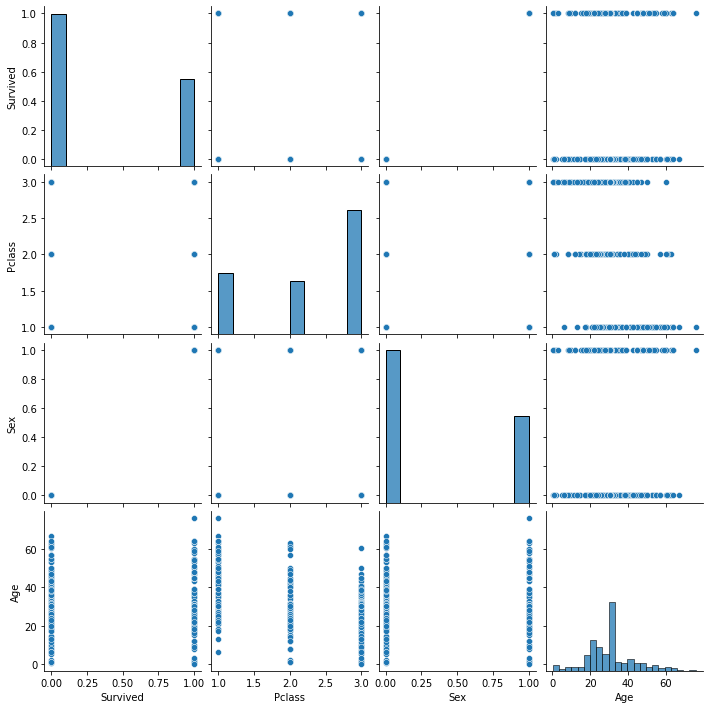

In [710]:
sns.pairplot(db)

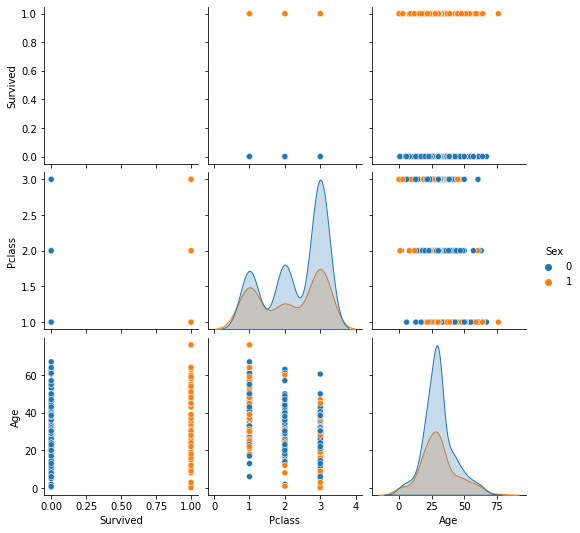

In [711]:
sns.pairplot(db,hue="Sex")

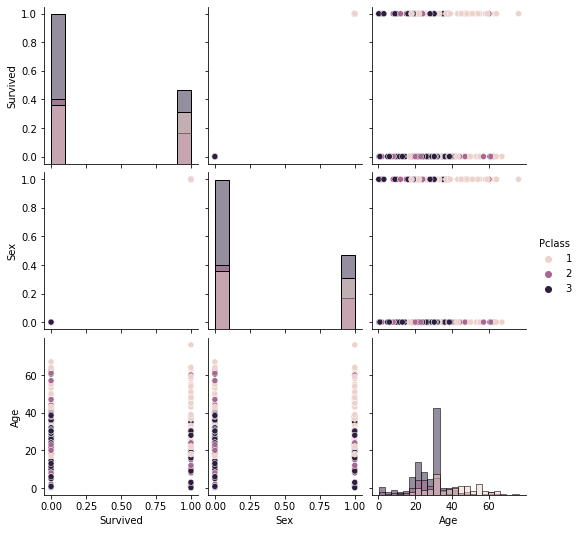

In [712]:
sns.pairplot(db,hue="Pclass",diag_kind="hist")

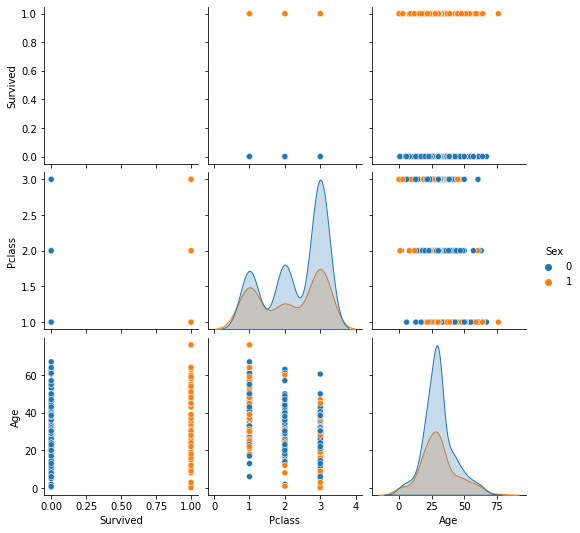

In [713]:
sns.pairplot(db,hue="Sex",diag_kind="kde")

<AxesSubplot:xlabel='Sex', ylabel='Age'>

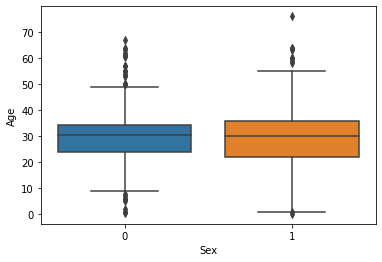

In [714]:
sns.boxplot(x="Sex",y="Age",data=db)

In [715]:
db.Embarked

0      Q
1      S
2      Q
3      S
4      S
      ..
413    S
414    C
415    S
416    S
417    C
Name: Embarked, Length: 418, dtype: object

In [716]:
# FOR CONVERTING STRINGS TO INTEGERS USING LABEL ENCODING:

In [114]:
 from sklearn.preprocessing import LabelEncoder


In [718]:
 le=LabelEncoder()

In [719]:
db.Embarked=le.fit_transform(db.Embarked)

In [720]:
db.Embarked

0      1
1      2
2      1
3      2
4      2
      ..
413    2
414    0
415    2
416    2
417    0
Name: Embarked, Length: 418, dtype: int32

In [721]:
# FOR CONVERTING STRINGS TO INTEGERS USING ONE HOT ENCODING:
# db=pd.get_dummies(db["Embarked"])

# IMPLEMENT USING LOGISTIC REGRESSION

In [116]:
from sklearn.linear_model import LogisticRegression


In [117]:
model_LR=LogisticRegression()

In [118]:
model_LR.fit(x_train,y_train)

LogisticRegression()

In [119]:
y_pred=model_LR.predict(x_test)

In [120]:
from sklearn.metrics import accuracy_score         #For checking the accuracy.

In [121]:
acc1=accuracy_score(y_test,y_pred)
acc1

1.0

In [122]:
model_LR.predict([[2,1,58]])

array([1], dtype=int64)

In [123]:
model_LR.predict([[1,0,40]])

array([0], dtype=int64)

# USING NAIVE_BAYES ALGORITHM

In [127]:
from sklearn.naive_bayes import GaussianNB

In [128]:
model_NB=GaussianNB()

In [129]:
model_NB.fit(x_train,y_train)

GaussianNB()

In [130]:
y_pred=model_NB.predict(x_test)
acc2=accuracy_score(y_test,y_pred)

In [131]:
acc2

1.0

In [132]:
model_NB.predict([[3,1,80]])

array([1], dtype=int64)

In [133]:
model_NB.predict([[3,0,27]])

array([0], dtype=int64)

# USING SVM ALGORITHM

In [134]:
from sklearn.svm import SVC

In [135]:
model_svm=SVC()

In [136]:
model_svm.fit(x_train,y_train)

SVC()

In [137]:
y_pred=model_svm.predict(x_test)

In [138]:
acc3= accuracy_score(y_test,y_pred)

In [139]:
acc3

0.5595238095238095

In [140]:
model_svm.predict([[1,0,40]])

array([0], dtype=int64)

In [141]:
model_svm.predict([[2,7,69]])

array([1], dtype=int64)

In [142]:
model_svm.predict([[3,1,22]])

array([0], dtype=int64)

In [143]:
# CROSS VALIDATION TECHNIQUES AND HYPER PARAMETER TUNING 

In [ ]:
# CROSS VALIDATION SCORE

In [ ]:
from sklearn.model_selection import cross_val_score

In [144]:
cross_val_score(SVC(C=10,gamma='auto',kernel='linear'),x,y,cv=5)

array([1., 1., 1., 1., 1.])

In [145]:
# GRID SEARCH CV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [146]:
gs = GridSearchCV(SVC(),
                 {
                     'C':[1,4,5,6,7,8,10],
                     'kernel':['rbf','linear'],
                     'gamma':['auto','scale']
                      
                 },cv=4,return_train_score=True)

gs.fit(x,y)
gs.cv_results_

{'mean_fit_time': array([0.01392037, 0.00390601, 0.00780731, 0.0022853 , 0.00981343,
        0.        , 0.00390524, 0.        , 0.01097924, 0.        ,
        0.01172048, 0.00790584, 0.01401013, 0.00399822, 0.02199864,
        0.00400078, 0.01599818, 0.00200111, 0.02000272, 0.00400048,
        0.01199859, 0.00200057, 0.01000154, 0.00200039, 0.00980937,
        0.00781071, 0.0117175 , 0.        ]),
 'std_fit_time': array([3.43104157e-03, 6.76541051e-03, 7.80731532e-03, 3.33304274e-03,
        6.46493956e-03, 0.00000000e+00, 6.76406842e-03, 0.00000000e+00,
        3.18739004e-03, 0.00000000e+00, 6.76682389e-03, 5.52506033e-03,
        3.44840433e-03, 3.99822036e-03, 6.62356869e-03, 4.00078300e-03,
        3.00811598e-06, 3.46601854e-03, 3.99732630e-03, 4.00048505e-03,
        4.00084317e-03, 3.46508940e-03, 3.46336950e-03, 3.46477968e-03,
        6.46319257e-03, 7.81071186e-03, 6.76510131e-03, 0.00000000e+00]),
 'mean_score_time': array([0.00199932, 0.        , 0.00390816, 0.        , 

In [147]:
db1=pd.DataFrame(gs.cv_results_)   # To convert it into Data Frame
db1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.013920,0.003431,0.001999,0.003463,1,auto,rbf,"{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}",0.942857,0.933333,...,0.971154,0.949817,0.013963,25,0.996805,0.996805,0.996815,0.996815,0.996810,0.000005
1,0.003906,0.006765,0.000000,0.000000,1,auto,linear,"{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}",1.000000,1.000000,...,1.000000,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.007807,0.007807,0.003908,0.006769,1,scale,rbf,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}",0.638095,0.638095,...,0.634615,0.636355,0.001740,28,0.635783,0.635783,0.636943,0.636943,0.636363,0.000580
3,0.002285,0.003333,0.000000,0.000000,1,scale,linear,"{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}",1.000000,1.000000,...,1.000000,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.009813,0.006465,0.005906,0.006491,4,auto,rbf,"{'C': 4, 'gamma': 'auto', 'kernel': 'rbf'}",0.980952,0.980952,...,0.980769,0.980861,0.000092,16,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,4,auto,linear,"{'C': 4, 'gamma': 'auto', 'kernel': 'linear'}",1.000000,1.000000,...,1.000000,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
6,0.003905,0.006764,0.003905,0.006764,4,scale,rbf,"{'C': 4, 'gamma': 'scale', 'kernel': 'rbf'}",0.857143,0.666667,...,0.788462,0.779991,0.070061,27,0.872204,0.667732,0.824841,0.824841,0.797404,0.077323
7,0.000000,0.000000,0.007811,0.007811,4,scale,linear,"{'C': 4, 'gamma': 'scale', 'kernel': 'linear'}",1.000000,1.000000,...,1.000000,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,0.010979,0.003187,0.004000,0.004000,5,auto,rbf,"{'C': 5, 'gamma': 'auto', 'kernel': 'rbf'}",0.980952,0.980952,...,0.980769,0.980861,0.000092,16,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
9,0.000000,0.000000,0.003906,0.006765,5,auto,linear,"{'C': 5, 'gamma': 'auto', 'kernel': 'linear'}",1.000000,1.000000,...,1.000000,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [148]:
db1[['param_C','param_gamma','param_kernel','mean_test_score']]

,param_C,param_gamma,param_kernel,mean_test_score
0,1,auto,rbf,0.949817
1,1,auto,linear,1.000000
2,1,scale,rbf,0.636355
3,1,scale,linear,1.000000
4,4,auto,rbf,0.980861
5,4,auto,linear,1.000000
6,4,scale,rbf,0.779991
7,4,scale,linear,1.000000
8,5,auto,rbf,0.980861
9,5,auto,linear,1.000000


In [149]:
gs.best_params_

{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}

In [150]:
gs.best_score_

1.0

In [151]:
# Randomized Search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [152]:
rs = RandomizedSearchCV(SVC(),
                 {
                     'C':[1,4,5,6,7,8,10],
                     'kernel':['rbf','linear'],
                     'gamma':['auto','scale']
                      
                 },cv=4,return_train_score=True,n_iter=4)

rs.fit(x,y)
rs.cv_results_

{'mean_fit_time': array([0.00400692, 0.00199938, 0.00600892, 0.00792247]),
 'std_fit_time': array([0.00400693, 0.00346302, 0.00346926, 0.00552403]),
 'mean_score_time': array([0.00200099, 0.00399989, 0.00399816, 0.        ]),
 'std_score_time': array([0.00346581, 0.00399989, 0.00399816, 0.        ]),
 'param_kernel': masked_array(data=['linear', 'linear', 'linear', 'rbf'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=['scale', 'auto', 'scale', 'scale'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_C': masked_array(data=[1, 7, 7, 5],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'kernel': 'linear', 'gamma': 'scale', 'C': 1},
  {'kernel': 'linear', 'gamma': 'auto', 'C': 7},
  {'kernel': 'linear', 'gamma': 'scale', 'C': 7},
  {'kernel': 'rbf', 'gamma': 'scale', 'C': 5}],

In [153]:
db2 = pd.DataFrame(rs.cv_results_)
db2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_gamma,param_C,params,split0_test_score,split1_test_score,...,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.004007,0.004007,0.002001,0.003466,linear,scale,1,"{'kernel': 'linear', 'gamma': 'scale', 'C': 1}",1.00000,1.0,...,1.000000,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.001999,0.003463,0.004000,0.004000,linear,auto,7,"{'kernel': 'linear', 'gamma': 'auto', 'C': 7}",1.00000,1.0,...,1.000000,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.006009,0.003469,0.003998,0.003998,linear,scale,7,"{'kernel': 'linear', 'gamma': 'scale', 'C': 7}",1.00000,1.0,...,1.000000,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,0.007922,0.005524,0.000000,0.000000,rbf,scale,5,"{'kernel': 'rbf', 'gamma': 'scale', 'C': 5}",0.92381,1.0,...,0.884615,0.920856,0.049215,4,0.936102,0.964856,0.929936,0.917197,0.937023,0.017456


In [154]:
db2[['param_C','param_gamma','param_kernel','mean_test_score']]

,param_C,param_gamma,param_kernel,mean_test_score
0,1,scale,linear,1.000000
1,7,auto,linear,1.000000
2,7,scale,linear,1.000000
3,5,scale,rbf,0.920856


In [155]:
rs.best_params_

{'kernel': 'linear', 'gamma': 'scale', 'C': 1}

In [156]:
rs.best_score_

1.0

# USING DECISION TREE ALGORITHM

In [746]:
from sklearn.tree import DecisionTreeClassifier

In [747]:
model_dt=DecisionTreeClassifier()

In [748]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [749]:
y_pred=model_dt.predict(x_test)

In [750]:
acc4=accuracy_score(y_test,y_pred)

In [751]:
acc4

1.0

In [752]:
model_dt.predict([[1,1,20]])

array([1], dtype=int64)

In [753]:
model_dt.predict([[2,7,69]])

array([1], dtype=int64)

In [754]:
model_dt.predict([[3,0,32]])

array([0], dtype=int64)

# USING KNN ALGORITHM

In [755]:
from sklearn.neighbors import KNeighborsClassifier

In [756]:
model_kn=KNeighborsClassifier()

In [757]:
model_kn.fit(x_train,y_train)

KNeighborsClassifier()

In [758]:
y_pred=model_kn.predict(x_test)

In [759]:
acc5=accuracy_score(y_test,y_pred)
acc5

0.9285714285714286

In [760]:
model_kn.predict([[3,1,32]])

array([0], dtype=int64)

In [761]:
model_kn.predict([[1,1,32]])

array([1], dtype=int64)

# USING RANDOMFOREST ALGORITHM

In [762]:
from sklearn.ensemble import RandomForestClassifier

In [763]:
model_rf=RandomForestClassifier()

In [764]:
model_rf.fit(x_train,y_train)

RandomForestClassifier()

In [765]:
y_pred=model_rf.predict(x_test)

In [766]:
acc6=accuracy_score(y_test,y_pred)
acc6

1.0

In [767]:
model_rf.predict([[3,1,32]])

array([1], dtype=int64)

In [768]:
model_rf.predict([[3,1,22]])

array([1], dtype=int64)

In [769]:
model_rf.predict([[2,1,20]])

array([1], dtype=int64)

# USING ADABOOST ALGORITHM

In [770]:
from sklearn.ensemble import AdaBoostClassifier

In [771]:
model_ab=AdaBoostClassifier()

In [772]:
model_ab.fit(x_train,y_train)

AdaBoostClassifier()

In [773]:
y_pred=model_ab.predict(x_test)

In [774]:
acc7=accuracy_score(y_test,y_pred)
acc7

1.0

In [775]:
model_ab.predict([[3,0,23]])

array([0], dtype=int64)

In [776]:
model_ab.predict([[3,1,34]])

array([1], dtype=int64)

# USING GRADIENT ALGORITHM

In [777]:
from sklearn.ensemble import GradientBoostingClassifier

In [778]:
model_g=GradientBoostingClassifier()

In [779]:
model_g.fit(x_train,y_train)

GradientBoostingClassifier()

In [780]:
y_pred=model_g.predict(x_test)

In [781]:
acc8=accuracy_score(y_test,y_pred)
acc8

1.0

In [782]:
model_g.predict([[3,0,23]])

array([0], dtype=int64)

In [783]:
model_g.predict([[3,1,39]])

array([1], dtype=int64)

# USING XGBOOST ALGORITHM

In [784]:
from xgboost import XGBClassifier

In [785]:
model_x=XGBClassifier()

In [786]:
model_x.fit(x_train,y_train)

[00:42:02] WARNING: D:\Build\xgboost\xgboost-1.4.2.git\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\python 3.8\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [787]:
y_pred=model_x.predict(x_test)

In [788]:
acc9=accuracy_score(y_test,y_pred)
acc9

1.0

In [789]:
model_x.predict(np.array([[3,0,23]]))

array([0], dtype=int64)

In [790]:
model_x.predict(np.array([[3,1,34]]))

array([1], dtype=int64)